In [1]:
import osr
import ogr
import gdal
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import rasterio
import glob
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd
import math
import rasterio as rio
from osgeo import gdal, gdal_array
import os
import gdal2tiles

In [2]:
!pip install gdal2tiles

In [2]:
def read_band_image(band, path):
    """
    This function takes as input the Sentinel-2 band name and the path of the 
    folder that the images are stored, reads the image and returns the data as
    an array
    input:   band           string            Sentinel-2 band name
             path           string            path of the folder
    output:  data           array (n x m)     array of the band image
             spatialRef     string            projection 
             geoTransform   tuple             affine transformation coefficients
             targetprj                        spatial reference
    """
    a = path+'*B'+band+'*.jp2'
    img = gdal.Open(glob.glob(a)[0])
    data = np.array(img.GetRasterBand(1).ReadAsArray())
    spatialRef = img.GetProjection()
    geoTransform = img.GetGeoTransform()
    targetprj = osr.SpatialReference(wkt = img.GetProjection())
    return data, spatialRef, geoTransform, targetprj

In [3]:
def read_band_image(path,dronedata):
    """
    This function takes as input the ldrone image and the path of the 
    folder that the images are stored, reads the image and returns the data as
    an array
    input:   drone          drone image
             path           string            path ,of the folder
    output:  data           array (n x m)     array of the band image
             spatialRef     string            projection 
             geoTransform   tuple             affine transformation coefficients
             targetprj                        spatial reference
    """
    
    os.chdir(path)
    os.getcwd()
    img_ds = gdal.Open(dronedata, gdal.GA_ReadOnly)
    data = np.zeros((img_ds.RasterYSize, img_ds.RasterXSize, img_ds.RasterCount),
                   gdal_array.GDALTypeCodeToNumericTypeCode(img_ds.GetRasterBand(1).DataType))

    for b in range(data.shape[2]):
        data[:, :, b] = np.array(img_ds.GetRasterBand(b + 1).ReadAsArray())


    spatialRef = img_ds.GetProjection()
    geoTransform = img_ds.GetGeoTransform()
    targetprj = osr.SpatialReference(wkt = img_ds.GetProjection())
    return data, spatialRef, geoTransform, targetprj


In [4]:
path = r'C:\Users\vaak\Desktop\UoS\weedwatch project\Transfer Learning'
inputfile1='Orthomosaic_28Jan2021_PatanCheru_AOI_50cm.vrt'
inputradar='ICEYE_X2_GRD_SL_52808_20210430T163904_AOI.tif'
(radardata, crs1, geoTransform1, targetprj1) = read_band_image(path,inputradar)
#os.chdir(path)
#os.getcwd()

!gdalbuildvrt -b 3 -b 4 -b 5 Orthomosaic_28Jan2021_PatanCheru_AOI_50cm.vrt Orthomosaic_28Jan2021_PatanCheru_AOI_50cm.tif

#gdal2tiles.generate_tiles(path+'\\'+inputfile1, path+'\\Tiles', nb_processes=2, zoom='7-9')

0...10...20...30...40...50...60...70...80...90...100 - done.


In [5]:
#https://newbedev.com/splitting-tif-image-into-several-tiles

#!python3 gdal2tiles_test.py


In [4]:
import os, gdal

in_path = r'C:\Users\vaak\Desktop\UoS\weedwatch project\Transfer Learning'
input_filename = '\Orthomosaic_28Jan2021_PatanCheru_AOI_50cm.tif'

out_path = r'C:\Users\vaak\Desktop\UoS\weedwatch project\Transfer Learning\1'
output_filename = 'tile_'

tile_size_x = 50
tile_size_y = 70

ds = gdal.Open(in_path + input_filename)
band = ds.GetRasterBand(1)
xsize = band.XSize
ysize = band.YSize


In [9]:
range(0, xsize, tile_size_x), range(0, ysize, tile_size_y), 

(range(0, 1710, 50), range(0, 2591, 70))

In [8]:
import os, gdal

in_path = r'C:\Users\vaak\Desktop\UoS\weedwatch project\Transfer Learning'
input_filename = '\Orthomosaic_28Jan2021_PatanCheru_AOI_50cm.tif'

out_path = r'C:\Users\vaak\Desktop\UoS\weedwatch project\Transfer Learning\1'
output_filename = 'tile_'

tile_size_x = 50
tile_size_y = 70

ds = gdal.Open(in_path + input_filename)
band = ds.GetRasterBand(1)
xsize = band.XSize
ysize = band.YSize

for i in range(0, xsize, tile_size_x):
    for j in range(0, ysize, tile_size_y):
        com_string = "gdal_translate -of GTIFF -srcwin " + str(i)+ ", " + str(j) + ", " + str(tile_size_x) + ", " + str(tile_size_y) + " " + str(in_path) + str(input_filename) + " " + str(out_path) + str(output_filename) + str(i) + "_" + str(j) + ".tif"        
        os.system(com_string)


In [ ]:
!gdal2tiles.py -p geodetic -k ICEYE_X2_GRD_SL_52808_20210430T163904_AOI.vrt
#gdal2tiles.generate_tiles(path+'\\'+inputradar, path+'\\Tiles', nb_processes=2, zoom='7-9')

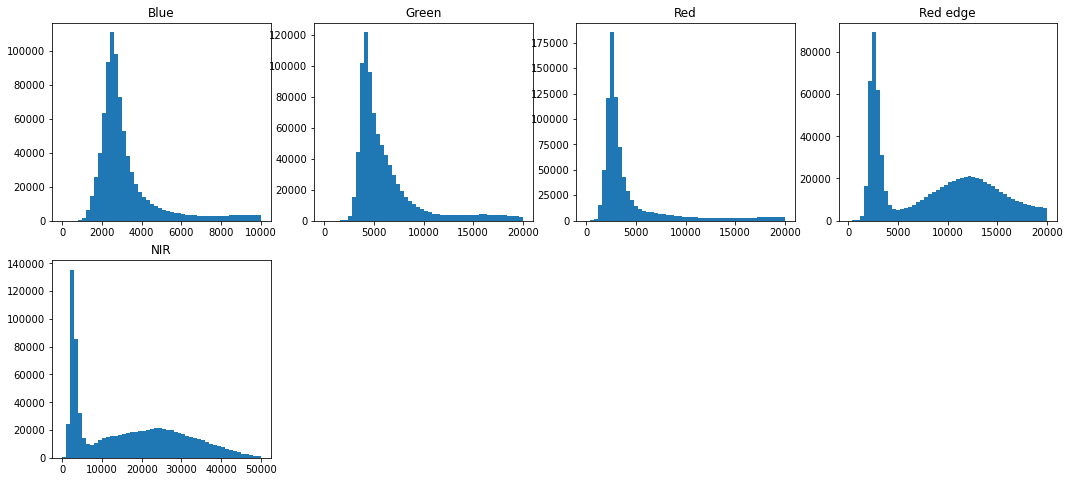

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18,8))

ax1 = fig.add_subplot(2,4,1); plt.title('Blue')
amap1_hist = plt.hist(np.ndarray.flatten(dronedata1[:,:,0]),bins=50,range=[1,10000]) 

ax2 = fig.add_subplot(2,4,2); plt.title('Green')
amap1_hist = plt.hist(np.ndarray.flatten(dronedata1[:,:,1]),bins=50,range=[1,20000]) 

ax3 = fig.add_subplot(2,4,3); plt.title('Red')
amap1_hist = plt.hist(np.ndarray.flatten(dronedata1[:,:,2]),bins=50,range=[1,20000]) 

ax4 = fig.add_subplot(2,4,4); plt.title('Red edge')
amap1_hist = plt.hist(np.ndarray.flatten(dronedata1[:,:,3]),bins=50,range=[1,20000]) 

ax5 = fig.add_subplot(2,4,5); plt.title('NIR')
amap1_hist = plt.hist(np.ndarray.flatten(dronedata1[:,:,4]),bins=50,range=[1,50000]) 


In [6]:
def visRGB(img1, img2, img3,
           title = 'RGB image',
           scale1 = [],
           scale2 = [],
           scale3 = [],
           flag = 0, outall = ''):
    """
    Visualise the RGB of a single acquisition
    """           
    if scale1 == []:
       scale1 = img1
    if scale2 == []:
       scale2 = img2
    if scale3 == []:
       scale3 = img3

    size = np.shape(img1)           
    iRGB = np.zeros([size[0],size[1],3])
    iRGB[:,:,0] = np.abs(img1)/(np.abs(scale1).mean()*1.5)
    iRGB[:,:,1] = np.abs(img2)/(np.abs(scale2).mean()*1.5)
    iRGB[:,:,2] = np.abs(img3)/(np.abs(scale3).mean()*1.5)
    iRGB[np.abs(iRGB) > 1] = 1
            
#    plt.figure()

    fig = plt.figure(figsize=(10,10))
    ax2 = fig.add_subplot(1,1,1)
    plot = plt.imshow(iRGB); 
    plt.title('(RGB image'); 
    cbar = plt.colorbar(plot,aspect=20); plt.set_cmap('gist_earth'); 
    cbar.set_label('Reflectance',rotation=90,labelpad=20); 
    ax2.ticklabel_format(useOffset=False, style='plain') #do not use scientific notation 
    rotatexlabels = plt.setp(ax2.get_xticklabels(),rotation=90) #rotate x tick labels 90 degrees

    if flag == 1:
        fig.savefig(outall)

    return       

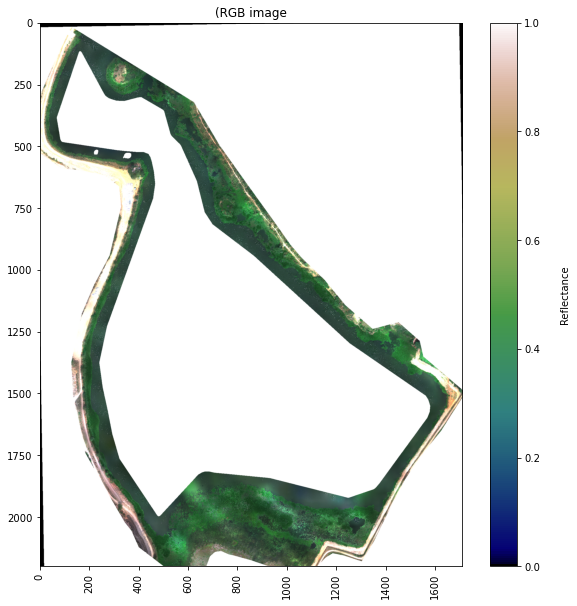

In [7]:
visRGB(dronedata1[200:2400,:,2], dronedata1[200:2400,:,1], dronedata1[200:2400,:,0],
           title = 'RGB image',
           scale1 = [0,20000],
           scale2 = [0,20000],
           scale3 = [0,15000],
           flag = 0, outall = '')


In [16]:
img=radardata[:,:,0]
img.shape

(2591, 1710)

In [10]:
import cv2
import math

In [9]:
conda install -c conda-forge opencv 

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\vaak\Anaconda3\envs\pv18

Note: you may need to restart the kernel to use updated packages.

  added / updated specs:
    - opencv


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    liblapacke-3.9.0           |     12_win64_mkl         4.5 MB  conda-forge
    libwebp-1.0.2              |       hfa6e2cd_5         356 KB  conda-forge
    opencv-4.1.1               |   py37h6afde12_1        47.8 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        52.6 MB

The following NEW packages will be INSTALLE



==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda


Systemet finner ikke angitt fil.
Systemet finner ikke angitt bane.
Systemet finner ikke angitt bane.


libwebp-1.0.2        | 356 KB    |            |   0% 
libwebp-1.0.2        | 356 KB    | 4          |   4% 
libwebp-1.0.2        | 356 KB    | ###5       |  36% 
libwebp-1.0.2        | 356 KB    | ####4      |  45% 
libwebp-1.0.2        | 356 KB    | ########9  |  90% 
libwebp-1.0.2        | 356 KB    | ########## | 100% 

opencv-4.1.1         | 47.8 MB   |            |   0% 
opencv-4.1.1         | 47.8 MB   |            |   0% 
opencv-4.1.1         | 47.8 MB   |            |   0% 
opencv-4.1.1         | 47.8 MB   |            |   0% 
opencv-4.1.1         | 47.8 MB   |            |   1% 
opencv-4.1.1         | 47.8 MB   |            |   1% 
opencv-4.1.1         | 47.8 MB   | 1          |   1% 
opencv-4.1.1         | 47.8 MB   | 1          |   1% 
opencv-4.1.1         | 47.8 MB   | 1          |   2% 
opencv-4.1.1         | 47.8 MB   | 1          |   2% 
opencv-4.1.1         | 47.8 MB   | 2          |   2% 
opencv-4.1.1         | 47.8 MB   | 2          |   2% 
opencv-4.1.1         | 47.8

In [20]:
import gmpy2

In [21]:
img_shape = img.shape
tile_size = (256, 256)
offset = (256, 256)

row_x =  img.shape[0]
column_y = img.shape[1]

tile_size_x = 224
tile_size_y = 224


range_x = mpz(ceil(row_x/tile_size_x))
range_y = mpz(ceil(column_y/tile_size_y))



for i in xrange(int(math.ceil(img_shape[0]/(offset[1] * 1.0)))):
    for j in xrange(int(math.ceil(img_shape[1]/(offset[0] * 1.0)))):
        cropped_img = img[offset[1]*i:min(offset[1]*i+tile_size[1], img_shape[0]), offset[0]*j:min(offset[0]*j+tile_size[0], img_shape[1])]
        # Debugging the tiles
        cv2.imwrite("debug_" + str(i) + "_" + str(j) + ".png", cropped_img)

NameError: name 'mpz' is not defined